# Applying Autoencoders to DNA Methylation data from TCGA (MLB Lab) ( 390000-> AE(-> 256\*23 -> 500 -> 100 ->500-> 256\*23 -> 390000)

In [ ]:
# EPOCH = 100
# BATCH_SIZE = 32
# NUM_FOLDS = 10

# # detect and init the TPU
# #tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()

# # instantiate a distribution strategy
# #tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

# # GET GPU STRATEGY
# gpu_strategy = tf.distribute.get_strategy()

# with gpu_strategy.scope():
#     kf = KFold(n_splits=NUM_FOLDS, shuffle=True, random_state=2021)
#     test_preds = []
#     for fold, (train_idx, test_idx) in enumerate(kf.split(train, targets)):
#         K.clear_session()
        
#         print('-'*15, '>', f'Fold {fold+1}', '<', '-'*15)
#         X_train, X_valid = train[train_idx], train[test_idx]
#         y_train, y_valid = targets[train_idx], targets[test_idx]
        
#         checkpoint_filepath = f"folds{fold}.hdf5"
#         if TRAIN_MODEL:
# #             model = keras.models.Sequential([
# #                 keras.layers.Input(shape=train.shape[-2:]),
# #                 keras.layers.Bidirectional(keras.layers.LSTM(1024, return_sequences=True)),
# #                 keras.layers.Bidirectional(keras.layers.LSTM(512, return_sequences=True)),
# #                 keras.layers.Bidirectional(keras.layers.LSTM(256, return_sequences=True)),
# #                 keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True)),
# #                 keras.layers.Dense(128, activation='selu'),
# #                 keras.layers.Dense(1),
# #             ])
            
#             n_output_nodes = 2
#             lstm_nodes = 64
#             dense_1_nodes = 32
#             optimizer = 'adam'
#             loss_fn = root_mean_squared_error

#             model = Sequential()
#             model.add(Bidirectional(LSTM(lstm_nodes, activation='relu', dropout=0.2), input_shape=(X_train.shape[1],X_train.shape[2])))
#             # model.add(LSTM(128,  activation='relu', return_sequences=True))
#             model.add(Dense(dense_1_nodes, activation="selu"))
#             model.add(Dense(n_output_nodes)) 
#             model.compile(loss=loss_fn, optimizer=optimizer,metrics = [loss_fn])
#             model.summary()
#             model.compile(optimizer="adam", loss="mae")
#             checkpoint_filepath = "vanillalstm"
            
#             lr = ReduceLROnPlateau(monitor='val_loss',patience=20, verbose=1, factor=0.5, min_lr=1e-10)
#             es = EarlyStopping(monitor="val_loss", patience=20, verbose=1, mode="min", restore_best_weights=True)
#             sv = ModelCheckpoint(
#                 checkpoint_filepath, monitor='val_loss', verbose=1, save_best_only=True,
#                 save_weights_only=False, mode='auto', save_freq='epoch',
#                 options=None
#             )
#             model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=EPOCH, batch_size=BATCH_SIZE, callbacks=[lr, es, sv])
#             model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs=100, batch_size=16,  verbose=1, shuffle=False, callbacks=[lr,sv])
#         else:
#             model = keras.models.load_model('../input/finetune-of-tensorflow-bidirectional-lstm/'+checkpoint_filepath)

#         if INFER_TEST:
#             print(' Predicting test data...')
#             test_preds.append(model.predict(reshape_data(x_test, timesteps=1)))

In [5]:
# pancancer_meth_list = []
# for chromsome, feature_list in chr_dict.items():
# #     print(chromsome)
# #     print(len(feature_list))
#     new_df = meth_5000_mvf[feature_list]
#     new_df = new_df.astype('float16')
#     print("Done conveting to float16") #For reducing space consumed
#     pancancer_meth_list.append(new_df)
# len(pancancer_meth_list)

In [2]:
# import pandas as pd
# import joblib
# meth_5000_mvf_path = 'meth_5000_mvf.pkl'
# meth_5000_mvf = joblib.load(meth_5000_mvf_path)
# meth_5000_mvf.shape

(9756, 5030)

In [3]:
# part_50 = meth_5000_mvf.sample(frac = 0.5, replace=False, random_state=1,axis=1)
# print(part_50.shape)
# # Creating dataframe with
# # rest of the 50% values
# rest_part_50 =meth_5000_mvf.drop(part_50.columns,axis=1)
# print(rest_part_50.shape)
# # print("\n50% of the given DataFrame:")
# # print(part_50)
 
# # print("\nrest 50% of the given DataFrame:")
# # print(rest_part_50)
# pancancer_meth_list= []
# pancancer_meth_list.append(part_50)
# pancancer_meth_list.append(rest_part_50)

(9756, 2515)
(9756, 2515)


In [1]:
import joblib
import pandas as pd

meth_df_path =  "pancancer_meth_chr_nonna_fillnamean.pkl"
pancancer_meth_list = joblib.load(meth_df_path)
len(pancancer_meth_list)

23

In [2]:
for chro in pancancer_meth_list:
    print(chro.shape)

(9756, 38021)
(9756, 19783)
(9756, 23600)
(9756, 19810)
(9756, 9745)
(9756, 12340)
(9756, 12446)
(9756, 17962)
(9756, 23404)
(9756, 5008)
(9756, 21049)
(9756, 28024)
(9756, 8649)
(9756, 3225)
(9756, 6994)
(9756, 20139)
(9756, 15927)
(9756, 19640)
(9756, 29181)
(9756, 24026)
(9756, 16464)
(9756, 8031)
(9756, 9706)


In [3]:
mv_pancancer_meth_list = []
for df in pancancer_meth_list:
    no_features = int(df.shape[1]/10)
    most_variable_genes = df.mad(axis = 0).nlargest(no_features, keep='all').index.values.tolist()
    #Subseting the genes from mvg_v3_df that are on the most_variable_genes list
    mvf_df = df[most_variable_genes]
    mv_pancancer_meth_list.append(mvf_df)
len(mv_pancancer_meth_list)

# ## Saving the list of chromosome dataframe
# joblib.dump(mv_pancancer_meth_list, "pancancer_meth_1000_chr_nonna_fillnamean.pkl")

23

In [4]:
for chro in mv_pancancer_meth_list:
    print(chro.shape)

(9756, 3813)
(9756, 1978)
(9756, 2367)
(9756, 1987)
(9756, 974)
(9756, 1239)
(9756, 1249)
(9756, 1802)
(9756, 2347)
(9756, 500)
(9756, 2106)
(9756, 2814)
(9756, 870)
(9756, 322)
(9756, 699)
(9756, 2016)
(9756, 1599)
(9756, 1967)
(9756, 2926)
(9756, 2407)
(9756, 1651)
(9756, 806)
(9756, 975)


In [5]:
# ## Saving the list of chromosome dataframe
joblib.dump(mv_pancancer_meth_list, "pancancer_meth_top10percent_chr_nonna_fillnamean.pkl")

['pancancer_meth_top10percent_chr_nonna_fillnamean.pkl']

### 5. Building a Vanilla Autoencoder

In [6]:
import tensorflow as tf
# print(tf.__version__)
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [7]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt

import tensorflow as tf
from numpy.random import seed
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Concatenate
from keras.models import Model
from keras import backend as K #For explicitly \adjusting the learning rate

In [86]:
from numpy.random import seed
seed(1)

tf.random.set_seed(2)


In [8]:
X_train, X_val = train_test_split(pancancer_meth_list[0], test_size=0.2, random_state = seed(77))
#Since the samples will be split similarly across all chromosomes, we shall match the indices for 
# X_train and X_val across all chr
training_indices = X_train.index
validation_indices = X_val.index

X_train_list = []
X_val_list = []
for chrom_df in pancancer_meth_list:
    X_train_list.append(chrom_df.loc[training_indices])
    X_val_list.append(chrom_df.loc[validation_indices])

In [106]:
tf.keras.backend.clear_session()
ncol_list = []
for df in pancancer_meth_list:
    ncol_list.append(df.shape[1])
    
number_of_chromosomes = len(pancancer_meth_list)

chromsomome_dim = 100 # 30*23
hidden_layer_dim = 500 
encoding_dim = 100 #Nodes in Bottleneck layer

# Encoder Layers
encoded1_list = []
input_dim_list = []
for ncol in ncol_list:
    input_dim_i = Input(shape = (ncol, ))
    input_dim_list.append(input_dim_i)
    encoded1_i = Dense(chromsomome_dim, activation = 'relu')(input_dim_i)
#     input_model = Model(inputs=input_dim_i, outputs=encoded1_i)
    encoded1_list.append(encoded1_i)

# encoded1 = concatenate(encoded1_list)
encoded1 = Concatenate(axis=1)(encoded1_list)
encoded2 = Dense(hidden_layer_dim, activation = 'relu')(encoded1)
encoded3 = Dense(encoding_dim, activation = 'relu')(encoded2)

# Decoder Layers
decoded3 = Dense(hidden_layer_dim, activation = 'relu')(encoded3)
decoded2 = Dense(chromsomome_dim*number_of_chromosomes, activation = 'relu')(decoded3)
reconstructured_inputs = []
for i in range(0,number_of_chromosomes):
    start = chromsomome_dim*(i)
    end = chromsomome_dim*(i+1)
    decoded2_i = decoded2[:,start:end] #Splicing the tensor back to chromsomome_dim*23 tensors
    decoded1_i = Dense(ncol_list[i], activation = 'sigmoid')(decoded2_i)
#     output_model = Model(inputs=decoded2_i, outputs=decoded1_i)
#     reconstructured_inputs.append(output_model.output)
    reconstructured_inputs.append(decoded1_i)
    
autoencoder = Model(inputs = input_dim_list, outputs = reconstructured_inputs)

ResourceExhaustedError: failed to allocate memory [Op:AddV2]

In [ ]:
autoencoder.summary()

In [ ]:
#Plotting the model
# !pip install pydot
from keras.utils.vis_utils import plot_model
plot_model(autoencoder, show_shapes=True, show_layer_names=True) #to_file='model_plot.png', )

In [ ]:
#MODEL Parameters
def averaged_mean_squared_error(y_true, y_pred):
        return (K.sqrt(K.mean(K.square(y_pred - y_true))))/number_of_chromosomes

# Compile the Model
autoencoder.compile(optimizer = 'adam', loss = averaged_mean_squared_error) 

#adam - stochastic gradient descent algorithm

# K.set_value(autoencoder.optimizer.learning_rate, 0.0001)


In [ ]:
#Implementing Early Stopping
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
import datetime

learning_rate = ReduceLROnPlateau(monitor='val_loss',patience=20, verbose=1, factor=0.5, min_lr=1e-10)

# earlystopping_callback = EarlyStopping(monitor='val_loss', patience=4, min_delta=0.0001)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# import h5py
# !pip install --upgrade h5py=1.8.21
# #Saving best Model after the Stopping
# mc = ModelCheckpoint('meth_ae_v1.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

In [ ]:
print(log_dir)

In [ ]:
history = autoencoder.fit(X_train_list, X_train_list, epochs = 100, batch_size = 16, shuffle = False, verbose = 1, validation_data = (X_val_list, X_val_list), callbacks=[learning_rate,tensorboard_callback])

In [ ]:
#Visualizing the Loss over epochs
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [33]:
# %load_ext tensorboard
# %tensorboard --logdir logs/fit

In [57]:
#Obtain the reduced data
encoder = Model(inputs = input_dim_list, outputs = encoded2) ##ToDo: Vv sketchy
# encoded_input = Input(shape = (encoding_dim, ))

encoded_train = pd.DataFrame(encoder.predict(pancancer_meth_list), index=pancancer_meth_list[0].index) #Maintain Index for Mapping to cancer type 
encoded_train = encoded_train.add_prefix('feature_')
encoded_train.shape

(9756, 100)

In [58]:
#output dataset
shape_before_removing_nan = encoded_train.shape
encoded_train.replace(0, np.nan, inplace=True) #Converting all the zero's to nan to use nan command
encoded_train.dropna(how='all',axis=1, inplace=True) #Removing columns with all nan rows
encoded_train.dropna(how='all',axis=0, inplace=True) #Removing rows with all nan columns
encoded_train.replace(np.nan, 0, inplace=True) #Converting all the nan's to zero to be compatible with t-SNE
print(shape_before_removing_nan, encoded_train.shape)

# encoded_train.to_csv("Meth_AE_v2.csv", index=True)
# encoded_train = pd.read_csv("Meth_AE_v2.csv",index_col=[0,1,2,3,4])

(9756, 100) (9756, 68)


In [59]:
#Scaling these features to -1,1 range for applying tsne
from sklearn.preprocessing import MinMaxScaler
feature_list = encoded_train.columns.tolist()
scaler = MinMaxScaler(feature_range=(0,1))
encoded_train[feature_list] = scaler.fit_transform(encoded_train[feature_list])

In [332]:
# encoded_train = pd.read_csv("Meth_AE_v2.csv",index_col=[0,1,2,3,4])

In [60]:
encoded_train.head()

,feature_1,feature_2,feature_3,feature_5,feature_8,feature_9,feature_10,feature_11,feature_12,feature_14,...,feature_88,feature_89,feature_90,feature_92,feature_93,feature_95,feature_96,feature_97,feature_98,feature_99
TCGA-OR-A5J4-01A-11D-A29J-05,0.155198,0.058043,0.633520,0.000000,0.000000,0.643232,0.286821,0.544151,0.308662,0.681692,...,0.608100,0.316091,0.905822,0.0,0.000000,0.635828,0.290874,0.278610,0.0,0.202462
TCGA-OR-A5KO-01A-11D-A29J-05,0.014334,0.000000,0.881422,0.073253,0.000000,0.817598,0.266755,0.557145,0.334239,0.595492,...,0.781525,0.597174,0.802667,0.0,0.113909,0.676567,0.167998,0.273019,0.0,0.176628
TCGA-OR-A5J9-01A-11D-A29J-05,0.000000,0.022637,0.388623,0.114329,0.000000,0.762692,0.343256,0.389031,0.276745,0.804450,...,0.617746,0.909359,0.630488,0.0,0.113048,0.715042,0.099376,0.275358,0.0,0.187828
TCGA-OR-A5K6-01A-11D-A29J-05,0.034455,0.093196,0.904548,0.035309,0.004153,0.586039,0.339948,0.506367,0.119190,0.524734,...,0.737108,0.573515,0.644732,0.0,0.000000,0.564056,0.341704,0.257298,0.0,0.171501
TCGA-OR-A5JJ-01A-11D-A29J-05,0.080941,0.000000,0.590750,0.171668,0.000000,0.794101,0.236233,0.355621,0.234657,0.622408,...,0.796015,0.743027,0.683791,0.0,0.124679,0.755233,0.209509,0.287156,0.0,0.126311


### 6. Dimension Reduction and Cluster Visualization using t-SNE 


perplexity parameter can be changed based on the input datatset - dataset with larger number of variables requires larger perplexity set this value between 5 and 50 (sklearn documentation) verbose=1 displays run time messages set n_iter sufficiently high to resolve the well stabilized cluster get embeddings


In [61]:
# Perform t-SNE on AE encoded_features
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0, perplexity=40, learning_rate=300, n_iter=400, verbose=1)
tsne_out = tsne.fit_transform(encoded_train)
# tsne_out = TSNE(n_components=2, perplexity=105, n_iter=1000, verbose=1).fit_transform(encoded_train)
tsne_components = pd.DataFrame(tsne_out, index =encoded_train.index ) #Maintain Index


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9756 samples in 0.000s...
[t-SNE] Computed neighbors for 9756 samples in 2.616s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9756
[t-SNE] Computed conditional probabilities for sample 2000 / 9756
[t-SNE] Computed conditional probabilities for sample 3000 / 9756
[t-SNE] Computed conditional probabilities for sample 4000 / 9756
[t-SNE] Computed conditional probabilities for sample 5000 / 9756
[t-SNE] Computed conditional probabilities for sample 6000 / 9756
[t-SNE] Computed conditional probabilities for sample 7000 / 9756
[t-SNE] Computed conditional probabilities for sample 8000 / 9756
[t-SNE] Computed conditional probabilities for sample 9000 / 9756
[t-SNE] Computed conditional probabilities for sample 9756 / 9756
[t-SNE] Mean sigma: 0.269628


C:\Users\ssrikrishnan6\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.596031
[t-SNE] KL divergence after 400 iterations: 1.374312


In [62]:
tsne_components = pd.DataFrame(tsne_out, index =encoded_train.index ) #Maintain Index
tsne_components.head()

,0,1
TCGA-OR-A5J4-01A-11D-A29J-05,18.427187,29.788738
TCGA-OR-A5KO-01A-11D-A29J-05,17.537188,29.807226
TCGA-OR-A5J9-01A-11D-A29J-05,18.284063,29.688286
TCGA-OR-A5K6-01A-11D-A29J-05,17.013435,29.736059
TCGA-OR-A5JJ-01A-11D-A29J-05,17.900778,29.716011


### 7. Mapping samples to cancer type


In [63]:
import pandas as pd
patient_metadata = pd.read_csv(r"C:\Users\ssrikrishnan6\ae_integration\info_all_ex.txt", sep = "\t")
patient_metadata = patient_metadata[[ 'cases.0.samples.0.portions.0.analytes.0.aliquots.0.submitter_id','cases.0.project.project_id','cases.0.samples.0.sample_type']] #tolist()
patient_metadata.rename(columns={'cases.0.project.project_id': "cancer_type", "cases.0.samples.0.portions.0.analytes.0.aliquots.0.submitter_id":"tcga_id"},inplace=True)
patient_metadata.set_index("tcga_id", inplace=True)

new_patient_indices = []
for index in patient_metadata.index:
    new_patient_indices.append("-".join(index.split("-")[:-3]))
patient_metadata.index = new_patient_indices

In [64]:
new_indices = []
for index in tsne_components.index:
    new_index = "-".join(index.split("-")[:4])
    new_indices.append(new_index)
tsne_components.index = new_indices

# new_tsne_components = tsne_components.copy()
# new_tsne_components.index = new_indices

# #Merging based on tcga_id
grouped_tsne = pd.merge(tsne_components , patient_metadata['cancer_type'] , left_index=True, right_index=True)

print(grouped_tsne.shape)
grouped_tsne.head()

(9151, 3)


,0,1,cancer_type
TCGA-05-4384-01A,-2.909688,-12.104111,TCGA-LUAD
TCGA-05-4390-01A,-2.706220,-13.750785,TCGA-LUAD
TCGA-05-4396-01A,-4.004797,-12.582388,TCGA-LUAD
TCGA-05-4405-01A,0.251540,-7.421369,TCGA-LUAD
TCGA-05-4410-01A,0.283924,-11.864086,TCGA-LUAD


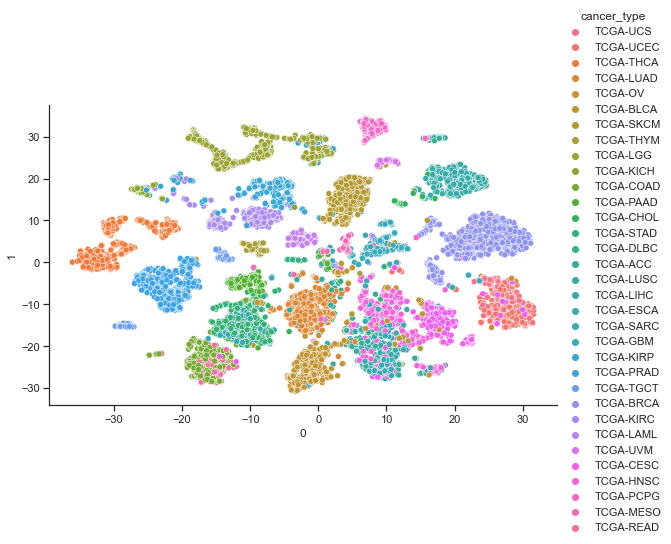

In [65]:
# CURRENT
import matplotlib.pyplot as plt
import seaborn
seaborn.set(style='ticks')

cancer_types = grouped_tsne['cancer_type'].tolist()
cancer_types = list(set(cancer_types))

seaborn.relplot(data=grouped_tsne, x=0, y=1, hue='cancer_type', hue_order=cancer_types, aspect=1.61)
plt.show()

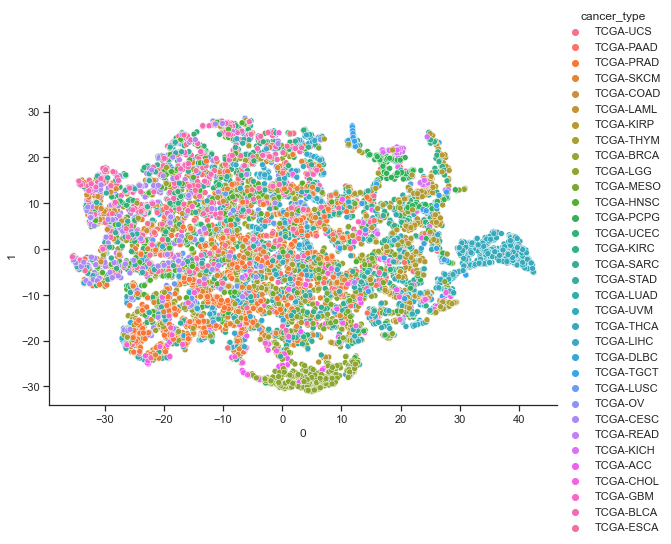

In [47]:
# Batch Size = 64, learning rate = 0.0001
import matplotlib.pyplot as plt
import seaborn
seaborn.set(style='ticks')

cancer_types = grouped_tsne['cancer_type'].tolist()
cancer_types = list(set(cancer_types))

seaborn.relplot(data=grouped_tsne, x=0, y=1, hue='cancer_type', hue_order=cancer_types, aspect=1.61)
plt.show()

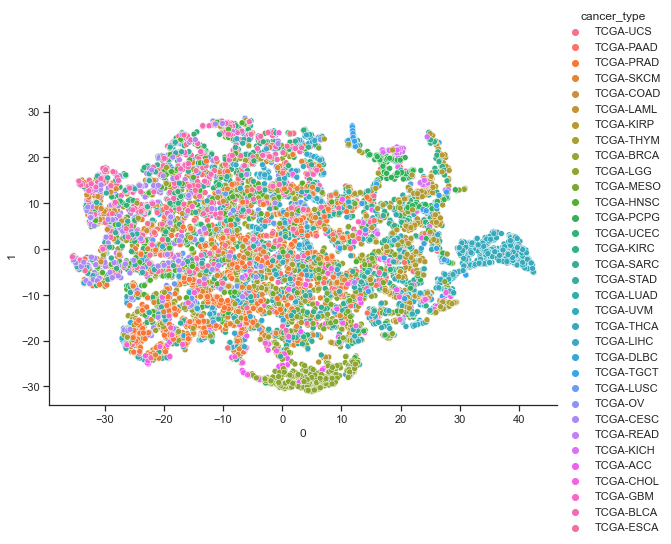

In [48]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set(style='ticks')

cancer_types = grouped_tsne['cancer_type'].tolist()
cancer_types = list(set(cancer_types))

seaborn.relplot(data=grouped_tsne, x=0, y=1, hue='cancer_type', hue_order=cancer_types, aspect=1.61)
plt.show()

Relplot = A figure-level function for visualizing statistical relationships using two common approaches: scatter plots and line plots. relplot() combines a FacetGrid with one of two axes-level functions: scatterplot() (with kind="scatter" ; the default)

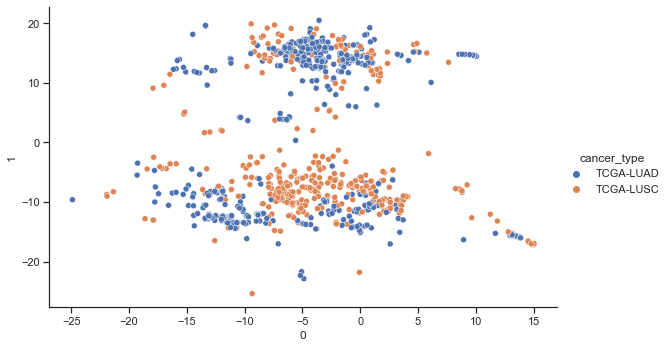

In [166]:
lung_cancer_types = ["TCGA-LUAD","TCGA-LUSC"] 
lung_cancer_df = grouped_tsne[grouped_tsne['cancer_type'].isin(lung_cancer_types)]

seaborn.relplot(data=lung_cancer_df, x=0, y=1, hue='cancer_type', hue_order=lung_cancer_types, aspect=1.61)
plt.show()

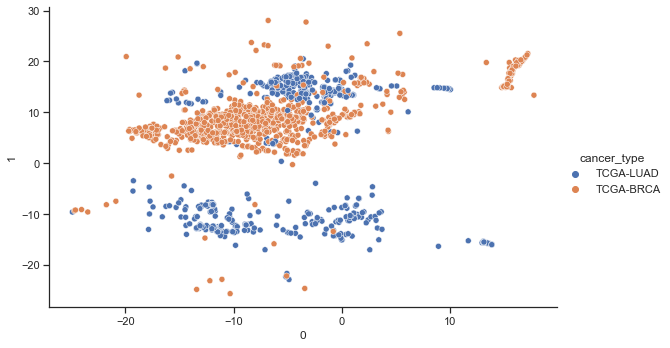

In [167]:
lung_breast_cancer_types = ["TCGA-LUAD","TCGA-BRCA"] 
lung_breast_cancer_df = grouped_tsne[grouped_tsne['cancer_type'].isin(lung_breast_cancer_types)]

seaborn.relplot(data=lung_breast_cancer_df, x=0, y=1, hue='cancer_type', hue_order=lung_breast_cancer_types, aspect=1.61)
plt.show()

In [4]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
import os
print (os.environ['CONDA_DEFAULT_ENV'])

tf_gpu


In [8]:
def plot_latent(z, anno, save = None, figsize = (10,10), axis_label = "Latent", **kwargs):
    _kwargs = {
        "s": 10,
        "alpha": 0.9,
    }
    _kwargs.update(kwargs)

    fig = plt.figure(figsize = figsize)
    ax = fig.add_subplot()
    cluster_types = set([x for x in np.unique(anno)])
    colormap = plt.cm.get_cmap("tab20", len(cluster_types))

    for i, cluster_type in enumerate(cluster_types):
        index = np.where(anno == cluster_type)[0]
        ax.scatter(z[index,0], z[index,1], color = colormap(i), label = cluster_type, **_kwargs)
    
    ax.legend(loc='upper left', prop={'size': 15}, frameon = False, ncol = 1, bbox_to_anchor=(1.04, 1))
    
    ax.tick_params(axis = "both", which = "major", labelsize = 15)

    ax.set_xlabel(axis_label + " 1", fontsize = 19)
    ax.set_ylabel(axis_label + " 2", fontsize = 19)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)  
    
    if save:
        fig.savefig(save, bbox_inches = "tight")
    
    print(save)


# plot_latent(ae_coordinates, anno_ctrl, axis_label = "Latent", save = "AE.pdf")

In [7]:
 !pip3 show tensorflow

Name: tensorflow
Version: 2.8.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\ssrikrishnan6\anaconda3\lib\site-packages
Requires: libclang, six, h5py, keras-preprocessing, termcolor, google-pasta, opt-einsum, tensorboard, gast, astunparse, flatbuffers, tf-estimator-nightly, tensorflow-io-gcs-filesystem, grpcio, protobuf, typing-extensions, absl-py, setuptools, wrapt, numpy, keras
Required-by: 


In [ ]:
import tf-night